# Chapter 9 - Đánh giá mô hình - Chọn mô hình và hiệu chỉnh tham số

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import pandas as pd

#### Đọc dữ liệu số viết tay

In [2]:
digits = datasets.load_digits()
digits.data.shape

(1797, 64)

In [3]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [4]:
digits.target.size

1797

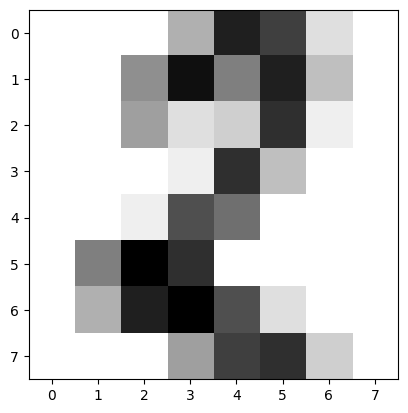

In [5]:
plt.imshow(digits.images[50], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [6]:
digits.target[50]

2

#### Chuẩn bị dữ liệu mô hình

In [7]:
X = digits.data
y = digits.target

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
model=RandomForestClassifier()

In [11]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [12]:
# Đánh giá trên 2 tập dữ liệu Train, Test 
model.score(X_test,y_test)

0.9740740740740741

In [13]:
X_new = X_test[100]
print(X_new.shape)
X_new = X_new.reshape(1,-1)
print(X_new.shape)
y_new = model.predict(X_new)
y_new

(64,)
(1, 64)


array([9])

#### Cách 1: Chia Train, Test theo các tỷ lệ

In [15]:
model=RandomForestClassifier()
# -------------------------------------------
# Duyệt qua các tỷ lệ [0.2,0.25,0.3]
#   Lặp 5 lần
#       Tách dữ liệu X_train, ....
#       Thực hiện học, đo độ đo các phase
#  In ra độ đo trung bình 5 lần chạy
# -------------------------------------------

for test_split in [0.2, 0.25, 0.3, 0.35, 0.4]:
    score_test = []
    for i in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_split)
        model = RandomForestClassifier()
        model.fit(X_train,y_train)
        score_test.append(model.score(X_test,y_test))
    print('With test size split ', test_split, ' we have test score: ', np.mean(score_test) ) 

With test size split  0.2  we have test score:  0.9754166666666668
With test size split  0.25  we have test score:  0.9728888888888889
With test size split  0.3  we have test score:  0.9747222222222224
With test size split  0.35  we have test score:  0.9730524642289348
With test size split  0.4  we have test score:  0.970653685674548


#### Cách 2: Dùng Cross_val_score để tính scores của model, cho biết score trung bình

In [17]:
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
scores = cross_val_score(model, X_train, y_train, scoring="accuracy", cv=5)
print(scores)
print(scores.mean() , scores.std())

[0.96666667 0.95925926 0.97769517 0.95910781 0.96282528]
0.9651108357428061 0.0068744030414909065


### <B> Chọn mô hình nào? </B>

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import time
import warnings
warnings.filterwarnings('ignore')
# Liệt kê các model sửng dụng
models=[SVC(), LogisticRegression(), GaussianNB(), KNeighborsClassifier(n_neighbors=11), RandomForestClassifier(), DecisionTreeClassifier()]
scores=[]
train_times=[]
names=[]

# Duyệt qua các models
    # ' Thực hiện cross val score với mỗi model (cv=10)
    # ' Thêm số liệu cho scores, train_times và names
# Tạo dataframe gồm 3 cột trên 
for model in models:
    start=time.time()
    scores.append(cross_val_score(model, X_train, y_train,scoring="accuracy", cv=10).mean())
    end=time.time()
    train_times.append(end-start)
    names.append(model.__class__.__name__)
    
df=pd.DataFrame(scores,columns=['Score'],index=range(len(models)))
df.insert(1,'Time',pd.Series(train_times))
df.insert(0,'Model',pd.Series(names))
df.head(10)

,Model,Score,Time
0,SVC,0.985152,0.253662
1,LogisticRegression,0.953964,0.541872
2,GaussianNB,0.850807,0.023990
3,KNeighborsClassifier,0.977711,0.267989
4,RandomForestClassifier,0.971039,2.082573
5,DecisionTreeClassifier,0.860448,0.109824


### Hiệu chỉnh tham số

In [32]:
grid_params = {'n_neighbors' : [3,5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

#### Dùng Grid Search CV

In [33]:
from sklearn.model_selection import GridSearchCV
knnmodel_grid = GridSearchCV(KNeighborsClassifier(), grid_params, cv=5)

In [34]:
start=time.time()
knnmodel_grid.fit(X_train,y_train)
end=time.time()

In [35]:
print ('Time (in miliseconds):',(end-start))
print(knnmodel_grid.best_score_)
print(knnmodel_grid.best_params_)

Time (in miliseconds): 3.779458999633789
0.9858901280462617
{'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'distance'}


#### Dùng Random Search CV

In [36]:
from sklearn.model_selection import RandomizedSearchCV
knnmodel_random = RandomizedSearchCV(KNeighborsClassifier(), grid_params, cv=5)

In [37]:
### Các bạn làm tiếp
start=time.time()
knnmodel_random.fit(X_train,y_train)
end=time.time()

print ('Time (in miliseconds):',(end-start))
print(knnmodel_grid.best_score_)
print(knnmodel_grid.best_params_)

Time (in miliseconds): 0.944366455078125
0.9858901280462617
{'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'distance'}


#### Chọn mô hình và đãnh giá

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score

y_pred = knnmodel_grid.predict(X_test)
score = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average='macro')
recall = recall_score(y_test,y_pred,average='macro')
f1 = f1_score(y_test,y_pred, average='macro')
print(score, recall, precision, f1)

### Các tham số thường sử dụng

In [ ]:
## Logistic Regression
grid_params = {'solvers'  : ['newton-cg', 'lbfgs', 'liblinear'],
               'penalty'  : ['l1','l2'],
               'c_values' : [100, 10, 1.0, 0.1, 0.01]}

## KNN
grid_params = {'n_neighbors' : [3,5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
## Naive Bayes
grid_params = {'var_smoothing': np.logspace(0,-9, num=100)}

## RandomForest
grid_params = {'n_estimators' : [10, 100, 1000],
               'max_features' : ['sqrt', 'log2']}

## SVM
grid_params = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

### Dùng ADABoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ml = DecisionTreeClassifier(max_depth=6)
clf = AdaBoostClassifier(n_estimators=50,base_estimator=ml)
score = cross_val_score(clf, X_train, y_train,scoring="accuracy", cv=10).mean()
print(score)


### Dùng XGBoost

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
score = cross_val_score(xgb_model, X_train, y_train,scoring="accuracy", cv=10).mean()
print(score)

In [45]:
from typing import List

class Solution:
    def lengthOfLongestSubstring(self, s: str) -> int:
        max_ = 0
        for i in range(len(s)):
            temp_res = s[i]
            while s[i] != s[i+1]:
                temp_res += s[i+1]
            if len(temp_res) > max_:
                max_ = len(temp_res)
        return max_
    
if __name__ == "__main__":
    sol = Solution()
    s = "abcabcbb"
    print(sol.lengthOfLongestSubstring(s))

KeyboardInterrupt: 